# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Predictions Infox - Comparaison Bag of Words

---

### Conseils JW
- Utiliser la courbe de ROC : superposition, et calcul de l'intégrale Area under curve = AUC
- Faire varier le seuil pour accuracy/recall/f1. La courbe de ROC résume tout ça.
- Essayer Naive Bayes avec distribution de Poisson
- Refaire un benchmark
- Faire des opérations de réduction de dimensions SVD sur le BoW `sklearn.decomposition.TruncatedSVD`
- Réseau de neurones : faire petit, metrique AUC
- Word Embedings : https://fasttext.cc/docs/en/crawl-vectors.html


# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [70]:
import importlib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paramètres globaux

In [200]:
random_state = 17

## Données d'entrainement

In [4]:
df_texts_recueil = pd.read_csv('data/demo/221123-TextInfox.csv')

In [5]:
df_texts_recueil

,url,infox,title,article,text
0,https://actu.fr/faits-divers/quatre-morts-dans...,0.0,Quatre morts dans un accident de la route sur ...,"Quatre personnes sont décédées, et une autre a...",Quatre morts dans un accident de la route sur ...
1,https://www.francetvinfo.fr/economie/budget/co...,0.0,Consommation : les Français boudent les distri...,Les distributeurs de billets vont-ils un jour ...,Consommation : les Français boudent les distri...
2,https://www.francetvinfo.fr/sante/contraceptio...,0.0,Avortement : le choix des Irlandais,"En Irlande, lors du référendum, les électeurs ...",Avortement : le choix des Irlandais\nEn Irland...
3,https://www.francesoir.fr/culture-celebrites/u...,0.0,Une ex de Cristiano Ronaldo compare porno et t...,Elle avait mis un pied dans le monde de la tél...,Une ex de Cristiano Ronaldo compare porno et t...
4,https://www.francesoir.fr/afp-afp-france/levee...,0.0,"Levée du statut de détenu signalé de Colonna, ...",Le Premier ministre Jean Castex a levé mardi l...,"Levée du statut de détenu signalé de Colonna, ..."
...,...,...,...,...,...
606,https://www.wikistrike.com/2022/09/11-septembr...,1.0,11 septembre 2001 : La théorie du « complot pi...,Le 11 septembre pour les nuls\nEst-il vrai que...,11 septembre 2001 : La théorie du « complot pi...
607,https://www.wikistrike.com/2022/10/selon-un-an...,1.0,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...","Selon un ancien conseiller du Pentagone, les É..."
608,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,La Pologne s’apprête à s’emparer du territoire...
609,https://www.wikistrike.com/2022/11/exclusivite...,1.0,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",Exclusivité WikiStrike: un physicien en colère...


In [6]:
df_texts_afp =  pd.read_csv('data/tmp/221118-TextsAfp.csv')

In [7]:
df_texts_afp

,url,text,infox
0,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,0.0
1,https://www.francesoir.fr/politique-france/la-...,La France lance un plan de sobriété énergétiqu...,0.0
2,https://www.francesoir.fr/politique-monde/mani...,Manifestations des femmes en Iran contre le po...,0.0
3,https://www.francesoir.fr/politique-france/aff...,Affaire Quatennens: LFI sous la pression de la...,0.0
4,https://www.francesoir.fr/politique-monde/covi...,"Covid-19: pour Joe Biden, ""la pandémie est ter...",0.0
...,...,...,...
3232,https://www.francesoir.fr/lifestyle-gastronomi...,La deuxième vie des coquilles d'huîtres\nLes h...,0.0
3233,https://www.francesoir.fr/lifestyle-gastronomi...,La truffe se fait rare\nVictime du réchauffeme...,0.0
3234,https://www.francesoir.fr/lifestyle-gastronomi...,Rungis prépare un Noël opulent malgré les atte...,0.0
3235,https://www.francesoir.fr/lifestyle-gastronomi...,Gastronomie: le Franco-Suisse Benoît Violier m...,0.0


In [8]:
with open('data/tmp/221110-IgnoreLemmas.txt','r') as file:
    ignore_words = file.read().split()

In [9]:
print(ignore_words[:100])
print(len(ignore_words))

['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'est', 'une', 'que', 'être', 'avoir', 'pour', 'dans', 'qui', 'il', 'par', 'sur', 'au', 'pas', 'ce', 'plaire', 'faire', 'ne', 'qu', 'pouvoir', 'se', 'avec', 'tout', 'ou', 'été', 'son', 'mais', 'aux', 'cette', 'on', 'nous', 'comme', 'elle', 'même', 'autre', 'devoir', 'ces', 'pays', 'leur', 'si', 'sa', 'ses', 'bien', 'état', 'contre', 'ils', 'vous', 'sans', 'voir', 'je', 'après', 'deux', 'depuis', 'mettre', 'russie', 'monde', 'entre', 'grand', 'an', 'dire', 'covid', 'invitant', 'guéguen', 'patiemment', 'méditation', 'eda', 'perdurer', 'inversement', 'guedj', 'penn', 'kang', 'officieux', 'jurisprudence', 'kant', 'hectare', 'islamisation', 'hebdo', 'guichard', 'entente', 'guihard', 'pepe', 'duel', 'haïr', 'naufrage', 'ironiquement', 'olivennes', 'juvénile', 'inégal', 'patois', 'justifiant', 'echos', 'jacky']
15203


In [10]:
df_words = pd.read_csv('data/prod/221125-InfoxWords.csv',index_col=0)

In [11]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,114412,23980,138392,False,False,False,False,False,False,False,True,True,True,True,True
la,63402,12901,76303,False,False,False,False,False,False,False,True,True,True,True,True
le,49361,9921,59282,False,False,False,False,False,False,False,True,True,True,True,True
et,38704,10142,48846,False,False,False,False,False,False,False,True,True,True,True,True
les,38053,10363,48416,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mayr,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
mazari,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
maçonnique,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False
maïté,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False


In [150]:
ignore_words_small = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index)
ignore_words_medium = list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index)
ignore_words_large = list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index)
ignore_words_xlarge = list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index)


In [151]:
common_80 = list(df_words[df_words['common_80']].index)
common_200 = list(df_words[df_words['common_200']].index)

In [152]:
ignore_words_large.sort()
ignore_words_large

['aae',
 'aag',
 'aah',
 'aaliyah',
 'aalto',
 'aanes',
 'aaph',
 'aapp',
 'aaraje',
 'aardal',
 'aarmement',
 'aasland',
 'aatip',
 'aaz',
 'ab',
 'abad',
 'abadie',
 'abaisse',
 'abascal',
 'abasi',
 'abasourdi',
 'abassiya',
 'abattant',
 'abatteur',
 'abaya',
 'abayas',
 'abayisenga',
 'abballa',
 'abbasi',
 'abbatial',
 'abbatucci',
 'abbeville',
 'abbie',
 'abbot',
 'abby',
 'abc',
 'abcd',
 'abcès',
 'abdallah',
 'abdelafid',
 'abdelatif',
 'abdelhady',
 'abdelhakim',
 'abdelkarim',
 'abdelmadjid',
 'abdelmajid',
 'abdelmoumen',
 'abdelsalam',
 'abdelshakour',
 'abdelwahab',
 'abderahmen',
 'abderaman',
 'abderrahmane',
 'abdessemed',
 'abdi',
 'abdication',
 'abdiquer',
 'abdiwahab',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abdullahi',
 'abe',
 'abeba',
 'abed',
 'abedi',
 'abeer',
 'abeiku',
 'abell',
 'aber',
 'aberdeen',
 'aberkane',
 'aberouz',
 'aberrant',
 'abertzaleen',
 'abessia',
 'abgrall',
 'abhorrer',
 'abid',
 'abidi',
 'abidine',
 'abidjanais',
 'abigaïlle',
 'abili

In [153]:
len(ignore_words_large)

39866

# Experience
---

## Feature Engineering

### Preprocessor

In [154]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.preprocess
#preprocessor=None

### Tokenizer

In [155]:
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text

### TfIdfVectorizer

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [201]:
#afp_size = 3000
#afp_size = 120
afp_size = 20
#afp_size = 0
df_ml = pd.concat([df_texts_recueil,df_texts_afp.sample(afp_size,random_state=random_state)])

In [202]:
%%time
#stop_words = ignore_words_small
#stop_words = ignore_words_medium
stop_words = ignore_words_large
#stop_words = ignore_words_xlarge
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=stop_words)
#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=stop_words)
count_matrix = vectorizer.fit_transform(df_ml['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf
X = df_X

len(df_X.keys())

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'affilier', 'agir', 'ambitieux', 'assourdir', 'astreindre', 'attraire', 'atténuer', 'automatiser', 'aviser', 'bail', 'bau', 'boire', 'bondir', 'braiser', 'bâtir', 'bénir', 'caractériser', 'chiner', 'circonstancier', 'converger', 'coordonner', 'cristalliser', 'croire', 'cuire', 'cuver', 'différer', 'décrier', 'déculotter', 'déplaire', 'désemparer', 'enrichir', 'envahir', 'fermer', 'glacer', 'granuler', 'généraliser', 'hirondeau', 'inclure', 'industrialiser', 'instruire', 'lyophiliser', 'maudire', 'menacer', 'miner', 'nourrir', 'nébuleux', 'obéir', 'paver', 'personnaliser', 'plafonner', 'plomber', 'rafraîchir', 'ravir', 'redécouvrir', 'remplacer', 'réfléchir', 'réformer', 'spécifier', 'stabiliser', 'structurer', 'subir', 'subventionner', 'séduire', 'tripler', 'veiller', 

CPU times: user 486 ms, sys: 8.84 ms, total: 495 ms
Wall time: 494 ms


11507

## Benchmark Sklearn

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
#from sklearn.metrics import roc_curve

In [204]:
#X = df_X
y=df_ml['infox']

In [205]:
df_X.shape

(631, 11507)

### Initialisations

In [206]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

In [207]:
def print_metrics(y_train, y_test, y_pred):
    print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
    print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
    print(f'Accuracy score \t{metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Recall score \t{metrics.recall_score(y_test, y_pred)*100:.2f}%')
    print(f'F1 score \t{metrics.f1_score(y_test, y_pred)*100:.2f}%')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred,normalize='all')
    print(f'False Positive \t{cnf_matrix[0,1]*100:.2f}%')
    print(f'False Negative \t{cnf_matrix[1,0]*100:.2f}%\n')    

### Benchmark

In [208]:
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [209]:
results =[]
def push_metrics(name, clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print('------------------------------------')
    print(f'Classifier : {name}')
    acc = metrics.accuracy_score(y_test, y_pred)
    print(f'Accuracy score {acc*100:.2f}%')
    recall = metrics.recall_score(y_test, y_pred)
    print(f'Recall score {recall*100:.2f}%')
    results.append({
        'Classifier' : name,
        'Accuracy' : round(acc*100),
        'Recall' : round(recall*100),
    })
    print('------------------------------------')

In [210]:
predictors = {
    'Dummy' : DummyClassifier(strategy='uniform', random_state=random_state),
    "Logistic Regression" : LogisticRegression(C=1000, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000),
#    "Nearest Neighbors" : KNeighborsClassifier(3),
#    "Linear SVM" : SVC(kernel="linear", C=0.025, probability=True, random_state=random_state),
    "RBF SVM" : SVC(gamma=2, C=1, probability=True, random_state=random_state),
#    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0), random_state=random_state),
    "Decision Tree" : DecisionTreeClassifier(max_depth=5, random_state=random_state),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=random_state),
    "Neural Network" : MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state),
#    "AdaBoost" : AdaBoostClassifier(random_state=random_state),
    "Gaussian Naive Bayes" : GaussianNB(),
#    "QDA" : QuadraticDiscriminantAnalysis(),
}


In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.75)
y_preds = {}
y_probas = {}
fit_times = {}
proba_times = {}

#for name, classifier in zip(names, classifiers):
for name in predictors.keys():
    
    classifier = predictors[name]
    print(f'Training {name}')
    
    start = time.time()
    classifier.fit(X_train, y_train)
    stop = time.time()
    fit_times[name] = stop - start
    
    print(f'Training time : {fit_times[name]} s')
    
    y_preds[name] = classifier.predict(X_test)
    
    start = time.time()
    y_probas[name] = classifier.predict_proba(X_test)
    stop = time.time()
    proba_times[name] = stop - start
print('Done !')

Training Dummy
Training time : 0.0003619194030761719 s
Training Logistic Regression
Training time : 0.43901491165161133 s
Training RBF SVM
Training time : 6.698093891143799 s
Training Decision Tree
Training time : 0.12280797958374023 s
Training Random Forest
Training time : 0.04009890556335449 s
Training Neural Network
Training time : 7.791909217834473 s
Training Gaussian Naive Bayes
Training time : 0.07783079147338867 s
Done !


## Mesure Résultats

### ROC et AUC

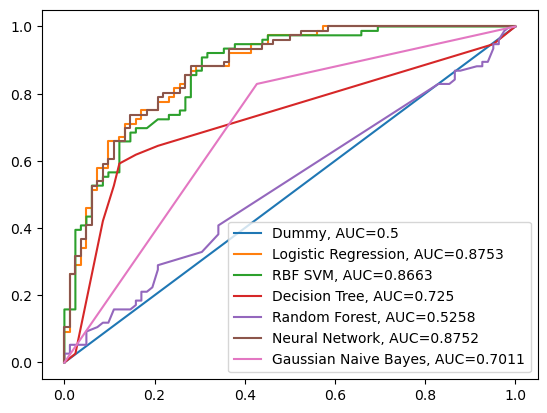

In [212]:
plt.figure(0).clf()
for name in y_probas.keys():
    y_proba = y_probas[name][:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
    plt.plot(fpr,tpr,label=f"{name}, AUC={auc}")
plt.legend()

In [216]:
bench_results = {}
for key in y_preds.keys():
    bench_results[key] = {}
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    bench_results[key]['roc_auc'] = metrics.roc_auc_score(y_test, y_probas[key][:, 1])
    bench_results[key]['accuracy']=metrics.accuracy_score(y_test, y_preds[key])
    bench_results[key]['recall']=metrics.recall_score(y_test, y_preds[key])
    bench_results[key]['f1']=metrics.f1_score(y_test, y_preds[key])
    bench_results[key]['log_loss'] = metrics.log_loss(y_test, y_preds[key])
    cnf_matrix = metrics.confusion_matrix(y_test, y_preds[key],normalize='all')
    bench_results[key]['false_positive']=cnf_matrix[0,1]
    bench_results[key]['false_negative']=cnf_matrix[1,0]
    bench_results[key]['fit_time']=fit_times[key]
    bench_results[key]['proba_time']=proba_times[key]
    

In [217]:
df_bench = pd.DataFrame(bench_results).T

In [218]:
print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
pd.options.display.float_format = '{:,.4f}'.format
df_bench.sort_values('roc_auc',ascending=False)

Train size 	473 = 250 False + 223 True
Test size 	158 = 82 False + 76 True



,roc_auc,accuracy,recall,f1,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.8753,0.7848,0.7500,0.7703,7.4325,0.0949,0.1203,0.4390,0.0413
Neural Network,0.8752,0.7785,0.6974,0.7518,7.6511,0.0759,0.1456,7.7919,0.0439
RBF SVM,0.8663,0.7278,0.5263,0.6504,9.3998,0.0443,0.2278,6.6981,0.6525
Decision Tree,0.7250,0.7278,0.6316,0.6906,9.3999,0.0949,0.1772,0.1228,0.0325
Gaussian Naive Bayes,0.7011,0.6962,0.8289,0.7241,10.4930,0.2215,0.0823,0.0778,0.0417
Random Forest,0.5258,0.5316,0.2105,0.3019,16.1765,0.0886,0.3797,0.0401,0.0334
Dummy,0.5000,0.4620,0.4868,0.4654,18.5812,0.2911,0.2468,0.0004,0.0002


In [149]:
print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
pd.options.display.float_format = '{:,.4f}'.format
df_bench.sort_values('roc_auc',ascending=False)

Train size 	473 = 250 False + 223 True
Test size 	158 = 82 False + 76 True



,roc_auc,accuracy,recall,f1,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.8744,0.7848,0.7368,0.7671,0.0886,0.1266,0.4256,0.0410
Neural Network,0.8734,0.7785,0.7105,0.7552,0.0823,0.1392,8.7518,0.0368
RBF SVM,0.8667,0.7278,0.5263,0.6504,0.0443,0.2278,6.7360,0.6531
Gaussian Naive Bayes,0.7194,0.7152,0.8289,0.7368,0.2025,0.0823,0.0763,0.0447
Decision Tree,0.6902,0.7152,0.5921,0.6667,0.0886,0.1962,0.1218,0.0325
Random Forest,0.5737,0.5506,0.1053,0.1839,0.0190,0.4304,0.0396,0.0329
Dummy,0.5000,0.4684,0.5000,0.4750,0.2911,0.2405,0.0002,0.0002


# Sauvegarde des résultats
---

# Conclusions
---

- 

# Bricolages
---